In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, solve

In [29]:
# parámetros
L = 1.0               # longitud de la barra
n = 99                # cota max de puntos interiores
h = L/(n+1)           # tamaño de paso espacial
kappa = 0.01          # difusión del calor
T = 0.05              # tiempo 
lam = 1e-3            

In [30]:
# matriz de diferencias finitas
D = np.zeros((n,n))
for i in range(n):
    if i>0:   D[i,i-1] =  1
    D[i,i]   = -2
    if i<n-1: D[i,i+1] =  1

D[0,0] = -1; D[0,1] = 1
D[-1,-2] = 1; D[-1,-1] = -1

D /= h**2
B = kappa * D

A = expm(B * T)

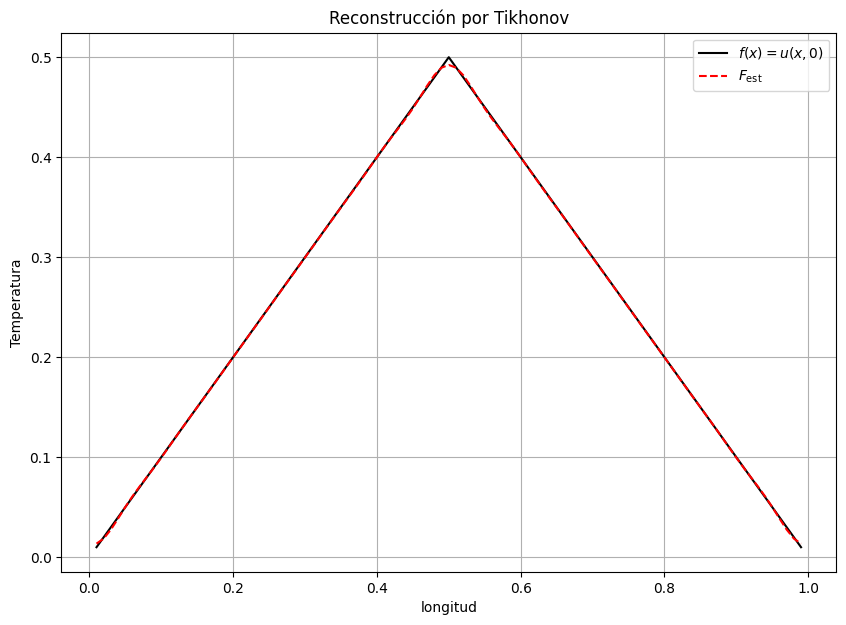

In [31]:
x = np.linspace(h, L-h, n)            
f = 0.5 - np.abs(x - 0.5)             # perfil inicial f(x)
U_T    = A @ f                       


F_est = solve(A.T @ A + lam * np.eye(n), A.T @ U_T)

# gráfica
plt.figure(figsize=(10,7))
plt.plot(x, f,  'k-',  label=r'$f_{\rm }(x)=u(x,0)$')
plt.plot(x, F_est,   'r--', label=r'$F_{\rm est}$')
plt.xlabel('longitud')
plt.ylabel('Temperatura')
plt.title('Reconstrucción por Tikhonov')
plt.legend()
plt.grid(True)
plt.show()
